In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [7]:
train = pd.read_csv("DataSet/train_SpamBase.csv")
X_train = train.drop("y",axis=1)
y_train = train.y

test = pd.read_csv("DataSet/test_SpamBase.csv")
X_test = test.drop("y",axis=1)
y_test = test.y

#class labels
spam=["Not Spam", "Spam"]

In [11]:
knn = KNeighborsClassifier()

#paramerts
param = range(3,15,2)

#create a gridSearchCv and set it up and sotre it in agrid variables

grid = GridSearchCV(
    knn,
    {"n_neighbors":param}
)

#taking the best knn through best_estimator in grideSearchCV
best_knn = grid.fit(X_train,y_train).best_estimator_

#getting the best model and displaying it
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

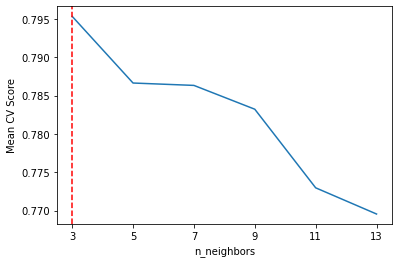

In [13]:
#here I'll be plotting the models that have been made up from grid and 
#red dotted line indicate the best model where the no of neighors
plt.plot(
    param,
    grid.cv_results_["mean_test_score"]
)

plt.xticks(param)
plt.xlabel("n_neighbors")
plt.ylabel("Mean CV Score")


plt.axvline(
    x=best_knn.n_neighbors,
    color ="red",
    ls="--"
)

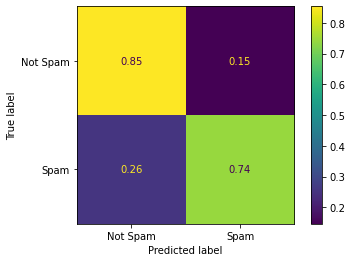

In [15]:
plot_confusion_matrix(
    best_knn , X_test,y_test,
    display_labels= spam,
    normalize = "true"
)


In [17]:
print("Accuracy on train data:"
     + str("{:.2%}".format(best_knn.score(X_train,y_train))))

print("Accuracy on test data:"
     + str("{:.2%}".format(best_knn.score(X_test,y_test))))


Accuracy on train data:89.50%
Accuracy on test data:81.10%
